## 결측치 종류

*1. MCAR(Missing Completely At Random) : 완전 무작위 결측*
> 결측치가 아예 무작위인 경우이다.
>
> 보통 이런 경우는 데이터를 유실했다거나, 전산에서 잘못 처리를 한 경우이며 대부분의 결측치는 제거 방법은 MCAR을 가정한다.
>
> MCAR의 특징은 결측치가 다른 변수들과 아무 상관이 없다는 것이다. 

*2. MAR(Missing At Random) : 무작위 결측*
> 결측값의 발생이 다른 변수에 따라 조건부로 발생하는 경우이다. 
> 예 : 남성들이 특정 설문에 응답하지 않는 경우 (여성은 대부분 한다는 가정)

*3. MNAR(Missing Not At Random)*
> 위의 두 가지 상황이 아닌 경우가 모두 해당. 즉 결측치의 값이 다른 변수와 연관이 있는 경우 
> 예 : 우울감이 심한 사람이 우울감 때문에 설문에 응답하지 않는 경우 

## 결측치 상관관계 
- 다른 특성의 값에 따라 결측치의 발생 확률을 계산
- X1이 True인 경우, X2가 결측치를 갖고, X1이 False인 경우, X2가 값을 가진다면 ..

# 데이터 불러오기 및 결측치 추가하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

zip_path = "/content/drive/MyDrive/Colab Notebooks/핸즈온머신러닝/datasets/archive.zip"
diabetes = pd.read_csv(zip_path)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.isnull().mean().sort_values(ascending = False)

Outcome                     0.0
Age                         0.0
DiabetesPedigreeFunction    0.0
BMI                         0.0
Insulin                     0.0
SkinThickness               0.0
BloodPressure               0.0
Glucose                     0.0
Pregnancies                 0.0
dtype: float64

In [ ]:
import numpy as np

for i in range(10, 768):
  if i % 2 == 0:
    diabetes.loc[i,'Insulin'] = np.nan
  if i % 3 == 0:
    diabetes.loc[i,'SkinThickness'] = np.nan
  if i % 4 == 0:
    diabetes.loc[i, 'BloodPressure'] = np.nan
  if i % 5 == 0:
    diabetes.loc[i, 'BMI'] = np.nan
  if i % 10 == 0:
    diabetes.loc[i, 'Glucose'] = np.nan

In [ ]:
diabetes.isnull().mean().sort_values(ascending = False)

Insulin                     0.493490
SkinThickness               0.328125
BloodPressure               0.246094
BMI                         0.197917
Glucose                     0.098958
Outcome                     0.000000
Age                         0.000000
DiabetesPedigreeFunction    0.000000
Pregnancies                 0.000000
dtype: float64

# 결측치 시각화 

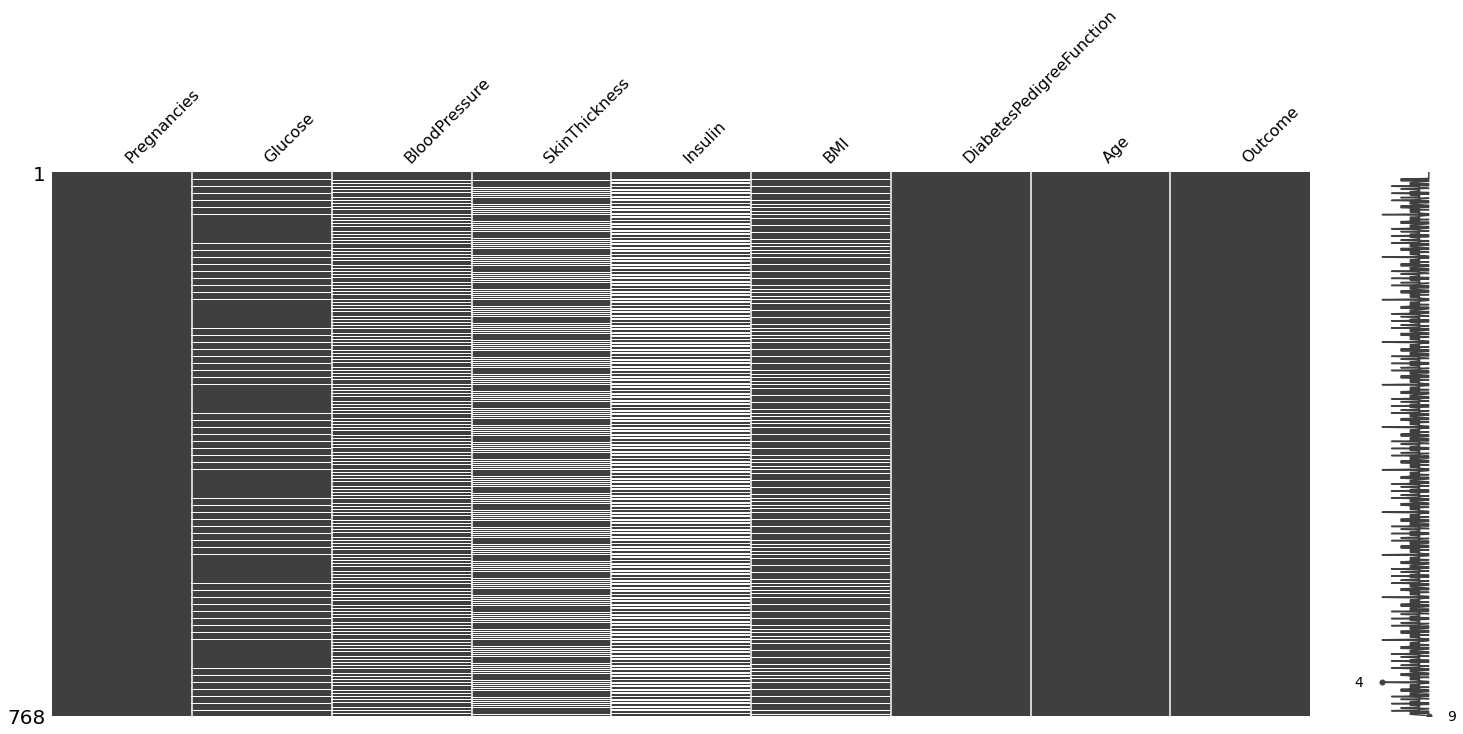

In [ ]:
import missingno as msno

msno.matrix(diabetes)

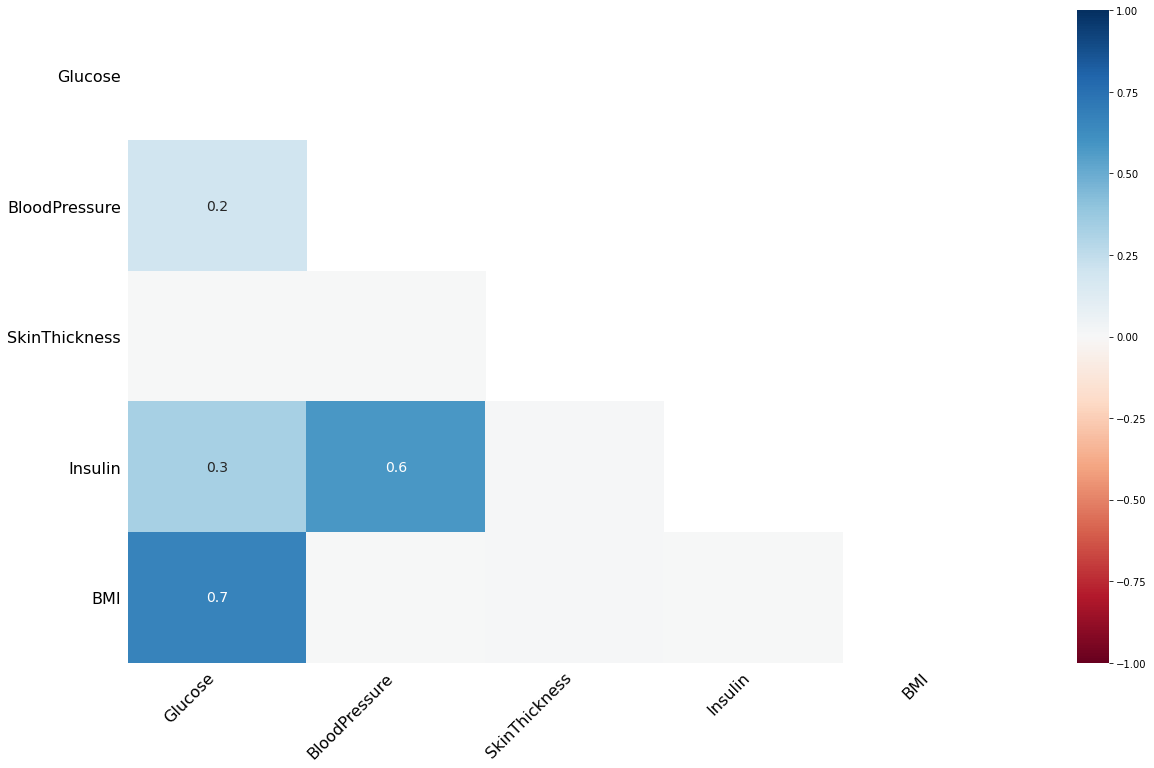

In [ ]:
msno.heatmap(diabetes)

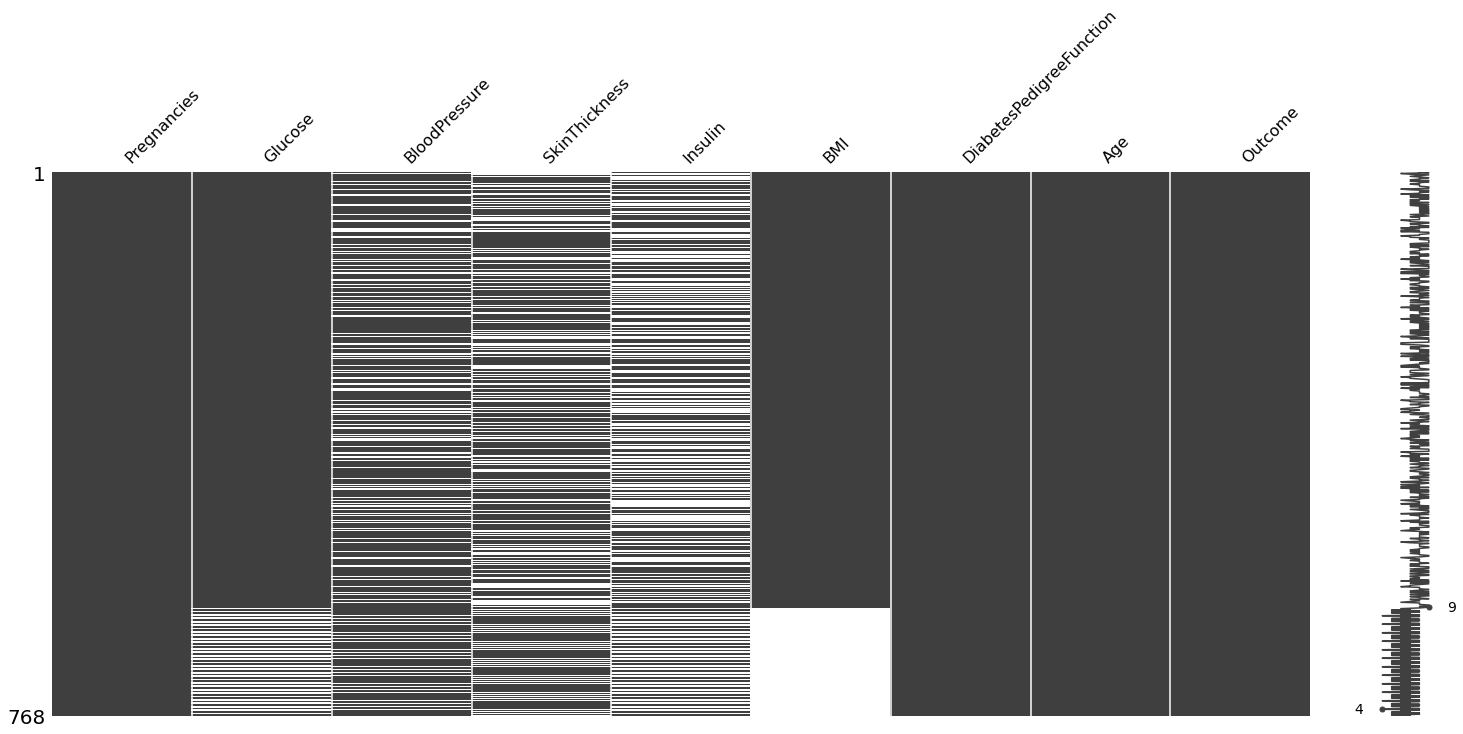

In [ ]:
# 결측치 간 상관관계 확인
# -- BMI + GLucose -> MNAR로 결론
# -- BloodPressure + Insulin -> MNAR로 결론
# -- Insulin + Glucose -> MAR로 결론 
# -- BloodPressure + Glucose -> MAR로 결론 
msno.matrix(diabetes.sort_values("BMI"))

# 결측치 처리 방법


## *1. KNNImputer*
> * KNN 알고리즘을 사용하여 결측치의 대체값을 찾는 방법
>
> * 다른 변수도 고려할 수 있다는 장점
>
> * Numeric은 average / Category는 Mode

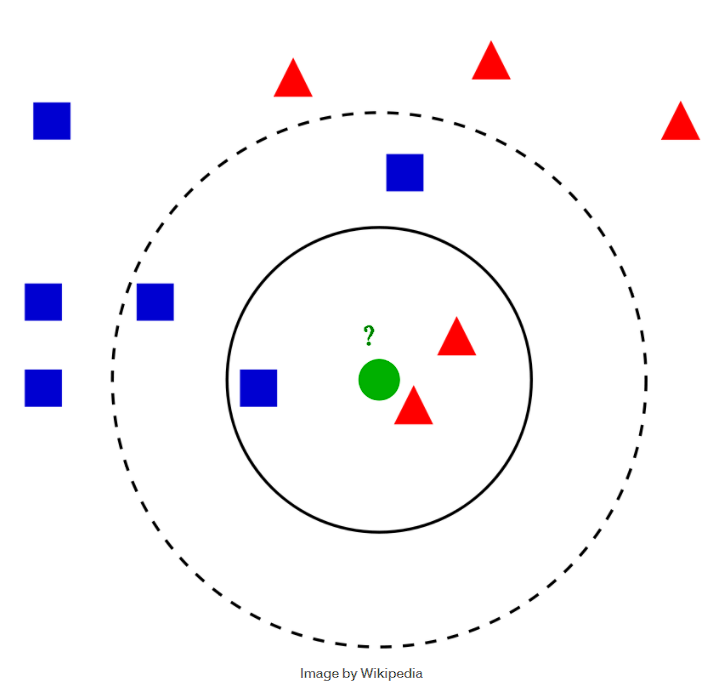

In [ ]:
from sklearn.impute import KNNImputer

diabetes_knn_imputed = diabetes.copy()
knn_imp = KNNImputer(n_neighbors = 3)
diabetes_knn_imputed.loc[:,:] = knn_imp.fit_transform(diabetes_knn_imputed)

diabetes_knn_imputed.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- KNN 알고리즘을 사용하는 만큼 하이퍼파라미터 K가 중요하다. 

- 따라서 K를 여러개 시도해보고 Original distribution과 가장 가까운 K를 찾는 것이 좋다. 

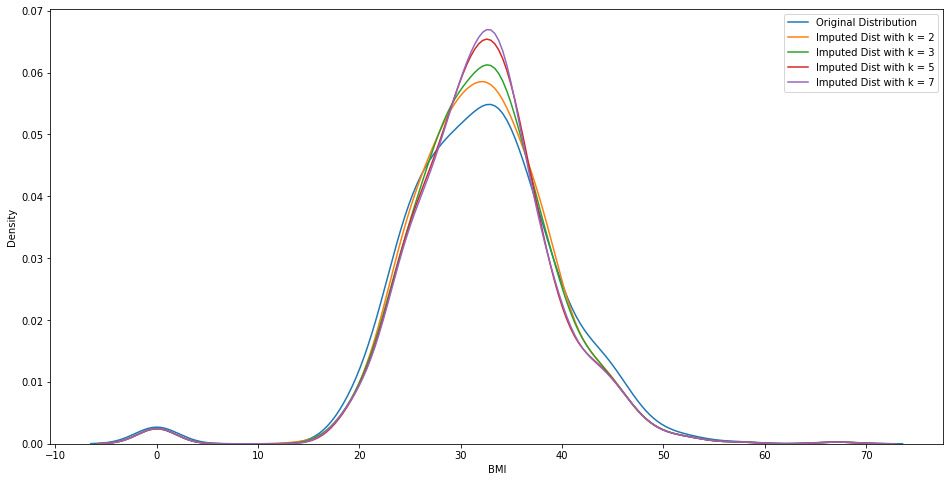

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

n_neighbors = [2, 3, 5, 7]

fig, ax = plt.subplots(figsize = (16, 8))
sns.kdeplot(diabetes.BMI, label = "Original Distribution")
for k in n_neighbors:
  knn_imp = KNNImputer(n_neighbors=k)
  diabetes_knn_imputed.loc[:,:] = knn_imp.fit_transform(diabetes.copy())
  sns.kdeplot(diabetes_knn_imputed.BMI, label = f"Imputed Dist with k = {k}")

plt.legend()

## *2. IterativeImputer*

- 모델 기반 추론을 통해 결측값의 예상치로 대체하는 것. 
- Step
> 1. A regressor is passed to the transformer.
> 2. The first feature (feature_1) with missing values is chosen.
> 3. The data is split into train/test sets where the train set contains all the known values for feature_1, and the test set contains the missing samples.
> 4. The regressor is fit on all the other variables as inputs and with feature_1 as an output.
> 5. The regressor predicts the missing values.
> 6. The transformer continues this process until all features are imputed.
> 7. Steps 1–6 are called a single iteration round. These steps are carried out multiple times as specified by the max_iter parameter of the transformer.

*max_iter를 통한 prediction accuracy를 높이고 final_value만 apply* 
*기타 early stopping hyperparameter 활용 가능*

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

diabetes_ii_imputed = diabetes.copy()

ii_imp = IterativeImputer(
    estimator = ExtraTreesRegressor(), max_iter = 10, random_state = 42
)

diabetes_ii_imputed.loc[:,:] = ii_imp.fit_transform(diabetes_ii_imputed)

diabetes_ii_imputed.isnull().sum()

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

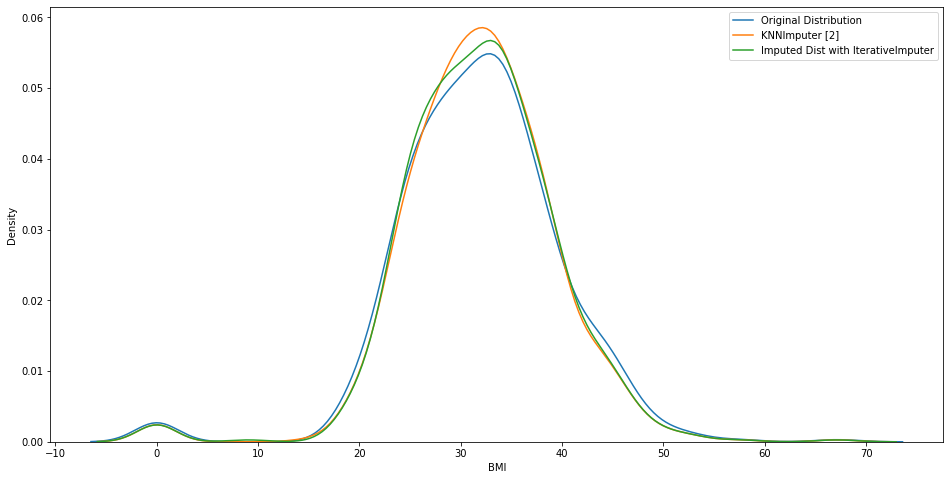

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

knn_imp = KNNImputer(n_neighbors=2)
diabetes_knn_imputed.loc[:,:] = knn_imp.fit_transform(diabetes.copy())

fig, ax = plt.subplots(figsize = (16, 8))
sns.kdeplot(diabetes.BMI, label = "Original Distribution")
sns.kdeplot(diabetes_knn_imputed.BMI, label = "KNNImputer [2]")
sns.kdeplot(diabetes_ii_imputed.BMI, label = f"Imputed Dist with IterativeImputer")

plt.legend()

# 성능 검증 

- *일반적으로 ItertiveImputer가 더 robust 하다고 알려져 있다. 또한 위의 분포처럼 더 original distribution에 가깝기 떄문에 더 잘된다고 한다. 하지만 확신은 하지마라. 성능만능주의다.* 

- *결과를 보면 KNNImputer(k=7) 일때가 가장 좋아보인다.* 

- *ItertiveImputer의 BysianRidge()나 ExtratreeRegressor()의 튜닝이 된다면 더 좋을수도 있다.*

In [ ]:
from sklearn.model_selection import train_test_split

X_full = diabetes.drop("Outcome", axis = 1).copy()
y_full = diabetes['Outcome'].values.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

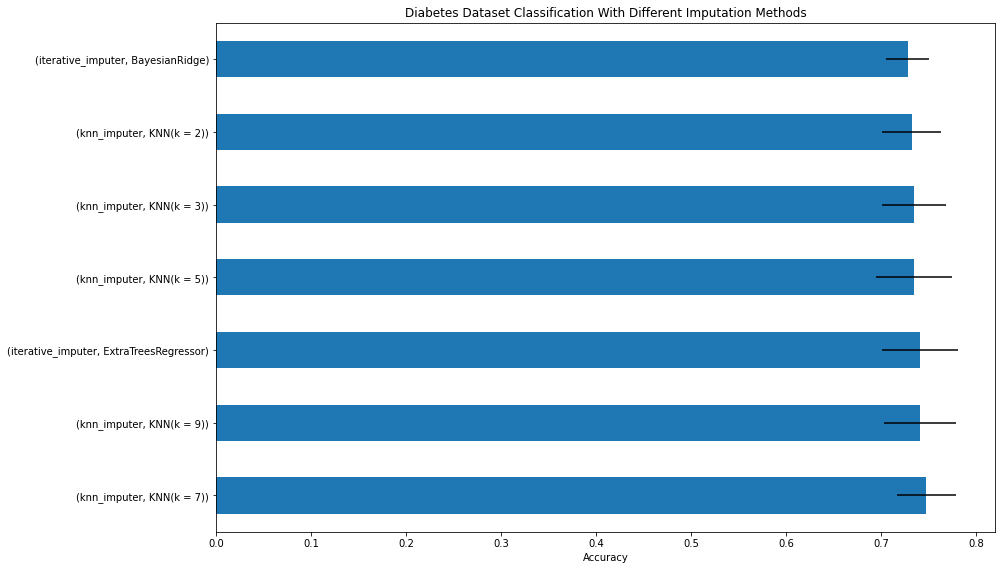

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Set global configs
cv = 5
scoring = 'accuracy'
state = 42
forest = RandomForestClassifier()

# Storage IterativeImputer scores
ii_scores = pd.DataFrame()
for estimator in [BayesianRidge(), ExtraTreesRegressor()]:
  pipe = make_pipeline(
      IterativeImputer(estimator=estimator, random_state = state), forest
  )
  ii_scores[estimator.__class__.__name__] = cross_val_score(
      pipe, X_full, y_full, scoring = scoring, cv = cv
  )

# Store KNN scores
knn_scores = pd.DataFrame()
n_neighbors = [2,3,5,7,9]
for k in n_neighbors:
  pipe = make_pipeline(KNNImputer(n_neighbors=k), forest)
  knn_scores[f'KNN(k = {k})'] = cross_val_score(
      pipe, X_full, y_full, scoring = scoring, cv = cv
  )

# Combine scores into a single DF
final_scores = pd.concat([ii_scores, knn_scores],
                         axis = 1,
                         keys = ["iterative_imputer", "knn_imputer"]
                         )

# Plot
fig, ax = plt.subplots(figsize = (14,8))

means, errors = final_scores.mean().sort_values(ascending = False), final_scores.std()
means.plot.barh(xerr=errors, ax = ax)

ax.set_title("Diabetes Dataset Classification With Different Imputation Methods")
ax.set_xlabel("Accuracy")
ax.set_yticks(np.arange(means.shape[0]))

plt.tight_layout(pad = 1)
plt.show()